In [195]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import re

# load in data 
salaries = pd.read_csv("../Desktop/salaries.csv")
nba_2020_stats = pd.read_csv("../Desktop/nba_stats.csv")

In [196]:
for row in range(len(nba_2020_stats)):
    nba_2020_stats.loc[row, "Player"] = nba_2020_stats['Player'][row][:nba_2020_stats['Player'][row].index('\\')]

# drop duplicates and add salary column
nba_2020_stats = nba_2020_stats.drop_duplicates(subset='Player')
nba_2020_stats.loc[:, 'Salary'] = pd.Series(dtype = 'float64', index = nba_2020_stats.index)

# salaries 
salaries_2020 = salaries[["Unnamed: 1", "Salary"]]
salaries_2020 = salaries_2020.rename(columns={"Unnamed: 1" : "Player"})
salaries_2020 = salaries_2020.drop([0], axis=0)
salaries_2020 = salaries_2020.dropna()

for row in salaries_2020.index:
    salaries_2020.loc[row, "Player"] = salaries_2020['Player'][row][:salaries_2020['Player'][row].index('\\')]

In [197]:
nba_2020_stats.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,NaN
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,NaN
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,NaN
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,NaN
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,NaN
5,6,Grayson Allen,SG,24,MEM,38,0,18.9,3.1,6.6,...,0.2,2.0,2.2,1.4,0.3,0.1,0.9,1.4,8.7,NaN
6,7,Jarrett Allen,C,21,BRK,70,64,26.5,4.3,6.6,...,3.1,6.5,9.6,1.6,0.6,1.3,1.1,2.3,11.1,NaN
7,8,Kadeem Allen,PG,27,NYK,10,0,11.7,1.9,4.4,...,0.2,0.7,0.9,2.1,0.5,0.2,0.8,0.7,5.0,NaN
8,9,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,NaN
9,10,Justin Anderson,SG,26,BRK,10,1,10.7,1.0,3.8,...,0.1,2.0,2.1,0.8,0.0,0.6,0.4,1.3,2.8,NaN


In [198]:
# add values to salary column of nba_2020_stats dataframe
for player in nba_2020_stats['Player'].tolist():
    if (player in salaries_2020['Player'].tolist()):
        player_index = nba_2020_stats[nba_2020_stats['Player'] == player].index.values.astype(int)[0]
        salary_index = salaries_2020[salaries_2020['Player'] == player].index.values.astype(int)[0]
        nba_2020_stats.loc[player_index, 'Salary'] = int(salaries_2020['Salary'][salary_index][1:])

# set index of dataframe to player names
nba_2020_stats = nba_2020_stats.set_index('Player')

# drop missing values
nba_2020_stats = nba_2020_stats.dropna(subset=['Salary'])

In [205]:
import numpy as np
from sklearn.model_selection import train_test_split

# ensures same set of train and test sets
np.random.seed(42)

train_set, test_set = train_test_split(nba_2020_stats, test_size=0.2, random_state=42)

In [206]:
train_set

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
Player,,,,,,,,,,,,,,,,,,,,,
Malik Monk,346,SG,21,CHO,55,1,21.3,3.9,8.9,0.434,...,0.5,2.4,2.9,2.1,0.5,0.3,1.4,1.3,10.3,5345687.0
James Ennis,147,SF-SG,29,TOT,69,18,18.3,2.3,5.2,0.446,...,1.0,2.5,3.6,0.9,0.5,0.3,0.8,2.0,6.6,3300000.0
Rodney Hood,227,SF,27,POR,21,21,29.5,4.1,8.2,0.506,...,0.5,3.0,3.4,1.5,0.8,0.2,0.9,2.2,11.0,10047450.0
Bruno Caboclo,83,C,24,TOT,30,0,8.1,1.3,3.0,0.427,...,0.8,1.2,2.0,0.4,0.5,0.6,0.4,1.0,3.0,2028594.0
Wesley Matthews,320,SG,33,MIL,67,67,24.4,2.5,6.3,0.396,...,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4,3623000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alex Caruso,93,PG,25,LAL,64,2,18.4,1.9,4.5,0.412,...,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5,2750000.0
Andre Drummond,140,C,26,TOT,57,56,33.0,7.3,13.8,0.533,...,4.4,10.8,15.2,2.7,1.9,1.6,3.6,3.5,17.7,28751775.0
Jamal Murray,358,PG,22,DEN,59,59,32.3,6.9,15.2,0.456,...,0.8,3.2,4.0,4.8,1.1,0.3,2.2,1.7,18.5,29250000.0


<AxesSubplot:>

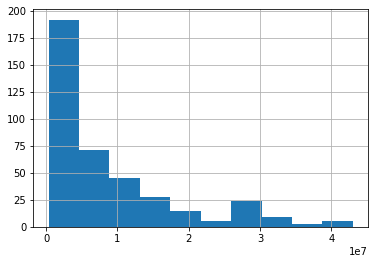

In [207]:
nba_2020_stats['Salary'].hist()

<AxesSubplot:xlabel='PTS', ylabel='Salary'>

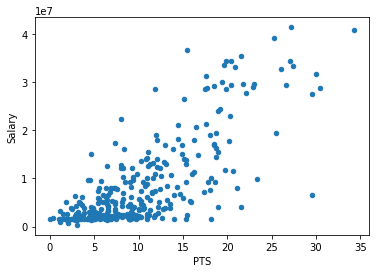

In [213]:
nba_2020_stats = train_set.copy()
nba_2020_stats.plot(kind="scatter", x='PTS', y='Salary')

<AxesSubplot:xlabel='MP', ylabel='Salary'>

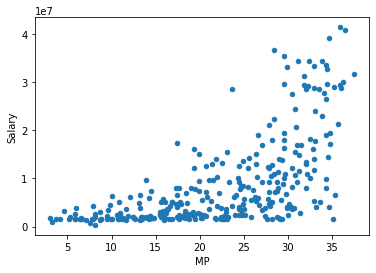

In [214]:
nba_2020_stats.plot(kind='scatter', x='MP', y='Salary')

In [215]:
corr_matrix = nba_2020_stats.corr()

In [216]:
corr_matrix['Salary'].sort_values(ascending=False)

Salary    1.000000
PTS       0.762866
FGA       0.745408
FG        0.742079
FT        0.739146
FTA       0.731487
TOV       0.703682
2PA       0.693453
2P        0.670387
MP        0.637759
AST       0.608506
DRB       0.589147
GS        0.574573
TRB       0.523496
STL       0.506912
3PA       0.501888
3P        0.476529
PF        0.387969
Age       0.331283
G         0.268486
ORB       0.259004
BLK       0.257133
FT%       0.169998
3P%       0.120706
FG%       0.090076
eFG%      0.085096
2P%       0.031728
Rk       -0.031996
Name: Salary, dtype: float64

In [217]:
nba_2020_stats.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,...,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,3.170000e+02
mean,265.091483,25.384858,48.924290,24.829653,22.000315,3.716404,8.094637,0.455754,1.103785,3.093691,...,0.915773,3.176972,4.092429,2.167823,0.697792,0.464038,1.269401,1.925237,10.175079,8.462461e+06
std,149.115794,4.003577,19.348256,24.576978,8.517326,2.275749,4.763476,0.083386,0.876911,2.246169,...,0.763944,1.923211,2.542613,1.844399,0.402164,0.432794,0.840120,0.740933,6.436366,9.102240e+06
min,2.000000,19.000000,2.000000,0.000000,3.000000,0.000000,0.300000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,3.400000e+05
25%,143.000000,22.000000,36.000000,2.000000,15.800000,2.000000,4.500000,0.414000,0.400000,1.400000,...,0.400000,1.800000,2.300000,1.000000,0.400000,0.200000,0.700000,1.500000,5.400000,2.033160e+06
50%,262.000000,25.000000,56.000000,16.000000,22.500000,3.300000,7.100000,0.445000,1.000000,2.800000,...,0.700000,2.900000,3.700000,1.500000,0.600000,0.300000,1.100000,1.900000,9.000000,4.588680e+06
75%,394.000000,28.000000,64.000000,50.000000,29.300000,4.900000,11.000000,0.484000,1.600000,4.400000,...,1.200000,4.000000,5.200000,2.800000,0.900000,0.600000,1.600000,2.400000,13.500000,1.140000e+07
max,529.000000,39.000000,74.000000,73.000000,37.500000,10.900000,22.900000,0.742000,4.400000,12.400000,...,4.400000,11.400000,15.200000,10.200000,2.000000,2.900000,4.800000,4.100000,34.300000,4.135881e+07


In [219]:
nba_2020_stats = train_set.drop("Salary", axis=1)
labels = train_set['Salary'].copy()

In [222]:
sample_incomplete_rows = nba_2020_stats[nba_2020_stats.isnull().any(axis=1)].head()
sample_incomplete_rows

,Rk,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joakim Noah,368,C,34,LAC,5,0,10.0,0.8,1.6,0.500,...,0.750,1.0,2.2,3.2,1.4,0.2,0.2,1.2,1.8,2.8
Clint Capela,87,C,25,HOU,39,39,32.8,6.3,9.9,0.629,...,0.529,4.3,9.5,13.8,1.2,0.8,1.8,1.6,2.6,13.9
Henry Ellenson,144,C,23,BRK,5,0,3.0,0.2,1.4,0.143,...,NaN,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4
Rudy Gobert,176,C,27,UTA,68,68,34.3,5.7,8.2,0.693,...,0.630,3.4,10.1,13.5,1.5,0.8,2.0,1.9,3.2,15.1
Richaun Holmes,226,C,26,SAC,44,38,28.2,5.1,7.8,0.648,...,0.788,2.9,5.3,8.1,1.0,0.9,1.3,1.2,3.8,12.3


In [223]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [226]:
nba_2020_stats_num = nba_2020_stats.drop(["Rk", "Pos", "Tm"], axis=1)

In [228]:
imputer.fit(nba_2020_stats_num)

SimpleImputer(strategy='median')

In [229]:
imputer.statistics_

array([25.    , 56.    , 16.    , 22.5   ,  3.3   ,  7.1   ,  0.445 ,
        1.    ,  2.8   ,  0.3475,  2.1   ,  4.1   ,  0.515 ,  0.526 ,
        1.1   ,  1.5   ,  0.776 ,  0.7   ,  2.9   ,  3.7   ,  1.5   ,
        0.6   ,  0.3   ,  1.1   ,  1.9   ,  9.    ])

In [231]:
X = imputer.transform(nba_2020_stats_num)
X

array([[21. , 55. ,  1. , ...,  1.4,  1.3, 10.3],
       [29. , 69. , 18. , ...,  0.8,  2. ,  6.6],
       [27. , 21. , 21. , ...,  0.9,  2.2, 11. ],
       ...,
       [22. , 59. , 59. , ...,  2.2,  1.7, 18.5],
       [28. , 59. , 57. , ...,  0.5,  1.7,  8. ],
       [20. , 36. , 28. , ...,  0.6,  2.7,  6.8]])

In [233]:
nba_2020_stats_transformed = pd.DataFrame(X, columns=nba_2020_stats_num.columns, index=nba_2020_stats_num.index)
nba_2020_stats_transformed.loc[sample_incomplete_rows.index.values]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Joakim Noah,34.0,5.0,0.0,10.0,0.8,1.6,0.500,0.0,0.0,0.3475,...,0.750,1.0,2.2,3.2,1.4,0.2,0.2,1.2,1.8,2.8
Clint Capela,25.0,39.0,39.0,32.8,6.3,9.9,0.629,0.0,0.0,0.3475,...,0.529,4.3,9.5,13.8,1.2,0.8,1.8,1.6,2.6,13.9
Henry Ellenson,23.0,5.0,0.0,3.0,0.2,1.4,0.143,0.0,0.8,0.0000,...,0.776,0.4,0.8,1.2,0.2,0.0,0.0,0.0,0.2,0.4
Rudy Gobert,27.0,68.0,68.0,34.3,5.7,8.2,0.693,0.0,0.0,0.3475,...,0.630,3.4,10.1,13.5,1.5,0.8,2.0,1.9,3.2,15.1
Richaun Holmes,26.0,44.0,38.0,28.2,5.1,7.8,0.648,0.0,0.0,0.3475,...,0.788,2.9,5.3,8.1,1.0,0.9,1.3,1.2,3.8,12.3


In [235]:
nba_2020_stats_cat = nba_2020_stats[["Pos", "Tm"]]
nba_2020_stats_cat.head(10)

,Pos,Tm
Player,,
Malik Monk,SG,CHO
James Ennis,SF-SG,TOT
Rodney Hood,SF,POR
Bruno Caboclo,C,TOT
Wesley Matthews,SG,MIL
Terence Davis,SG,TOR
Thaddeus Young,PF,CHI
De'Aaron Fox,PG,SAC
Fred VanVleet,SG,TOR


In [236]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
nba_2020_stats_cat_1hot = cat_encoder.fit_transform(nba_2020_stats_cat)
nba_2020_stats_cat_1hot

<317x43 sparse matrix of type '<class 'numpy.float64'>'
	with 634 stored elements in Compressed Sparse Row format>

In [240]:
nba_2020_stats_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [239]:
cat_encoder.categories_

[array(['C', 'PF', 'PF-C', 'PF-SF', 'PG', 'PG-SG', 'SF', 'SF-C', 'SF-PF',
        'SF-SG', 'SG', 'SG-PG'], dtype=object),
 array(['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET',
        'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN',
        'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS',
        'TOR', 'TOT', 'UTA', 'WAS'], dtype=object)]

In [425]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

nba_2020_stats_num_transformed = num_pipeline.fit_transform(nba_2020_stats_num)

In [426]:
nba_2020_stats_num_transformed

array([[-1.09696663,  0.31451494, -0.97112543, ...,  0.15569905,
        -0.84518481,  0.01943933],
       [ 0.90440558,  1.03923837, -0.27832758, ..., -0.55961398,
         0.10106398, -0.55632804],
       [ 0.40406253, -1.44552767, -0.15606914, ..., -0.44039514,
         0.37142077,  0.12836829],
       ...,
       [-0.8467951 ,  0.52157878,  1.39253781, ...,  1.10944976,
        -0.30447122,  1.29546431],
       [ 0.65423405,  0.52157878,  1.31103218, ..., -0.9172705 ,
        -0.30447122, -0.33847012],
       [-1.34713815, -0.66903828,  0.12920056, ..., -0.79805166,
         1.04731276, -0.52520548]])

In [437]:
lin_reg_num = LinearRegression()
lin_reg_num.fit(nba_2020_stats_num_transformed, labels)


LinearRegression()

In [467]:

aight = lin_reg_num.predict(nba_2020_stats_num_transformed)
top_30_aight = aight.argsort()[-30:][::-1] # top 30 salaries predicted by model

for salary in top_30_aight:
     print(nba_2020_stats_num.iloc[salary:salary+1].index.values[0], 
           aight[salary], 
           labels[nba_2020_stats_num.iloc[salary:salary+1].index.values[0]])

James Harden 41789019.98813166 40824000.0
Kawhi Leonard 33025547.25128261 34379100.0
Damian Lillard 31914723.78881059 31626953.0
Giannis Antetokounmpo 31773135.42739656 27528090.0
LeBron James 31735068.370745383 39219565.0
Anthony Davis 31351833.683318973 32742000.0
Russell Westbrook 31337928.592452705 41358814.0
Bradley Beal 30008577.48640988 28751775.0
Jimmy Butler 28166995.494996086 34379100.0
Trae Young 28139001.236251928 6571800.0
Joel Embiid 28124406.780643985 29542010.0
Kyrie Irving 27618845.992515773 33329100.0
Paul George 25755090.67635808 35450412.0
Kyle Lowry 24984639.70267378 30000000.0
Kevin Love 24563354.71566973 31300000.0
DeMar DeRozan 23731415.03161415 27739975.0
Zach LaVine 23670106.72913283 19500000.0
Andre Drummond 23624985.96914267 28751775.0
Kristaps Porziņģis 23567125.318949193 29467800.0
Jayson Tatum 22775623.8223262 9897120.0
Devin Booker 22753971.472828846 29430000.0
Pascal Siakam 22554305.476716205 29000000.0
Danilo Gallinari 22204030.952673696 19500000.0
Kem

In [470]:
lin_reg_num.score(X_test_prepared_num, y_test)

-0.32807056364228426

In [448]:
salary_predictions_num = lin_reg_num.predict(X_test_prepared_num)

In [449]:
np.argmax(salary_predictions_num) 

12

In [455]:
X_test_num.iloc[12:13, :] # Luka

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Luka Dončić,20,61,61,33.6,9.5,20.6,0.463,2.8,8.9,0.316,...,0.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8


In [463]:
top_30_num = salary_predictions_num.argsort()[-30:][::-1] # top 30 salaries predicted by model
top_30_num

array([12, 53, 25, 29, 14, 22, 18, 62, 36, 41, 37, 50, 68, 28, 76, 49, 77,
       32, 69,  8, 35, 60, 51, 11, 27, 20, 23, 73, 65, 59])

In [465]:
X_test_num.iloc[53:54, :] # Luka

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,31,5,5,27.8,6.6,16.4,0.402,2.4,9.8,0.245,...,1.0,0.8,4.4,5.2,6.6,1.0,0.4,3.2,2.2,20.8


In [459]:
for salary in top_30_num:
     print(X_test_num.iloc[salary:salary+1].index.values[0], 
           salary_predictions_num[salary], y_test[X_test_num.iloc[salary:salary+1].index.values[0]])

Luka Dončić 40578681.984320216 8049360.0
Stephen Curry 39193518.034980945 43006362.0
Karl-Anthony Towns 37074440.82786046 29430000.0
Chris Paul 35998491.48826742 41358814.0
Nikola Vučević 35254261.47605559 26000000.0
D'Angelo Russell 31896227.152727924 28649250.0
Jusuf Nurkić 31633060.56087195 12000000.0
Lou Williams 30763528.687840156 8000000.0
Donovan Mitchell 29587442.487250313 5195501.0
Julius Randle 29324064.460115604 18900000.0
Jrue Holiday 29213220.313528925 26131111.0
CJ McCollum 29176126.348011717 29354152.0
Al Horford 26450097.031713784 27500000.0
Brook Lopez 25968466.332156003 12697675.0
Ben Simmons 25467870.290460475 29250000.0
Mike Conley 25393370.755842865 34504132.0
Marc Gasol 23999199.937711097 2564753.0
Collin Sexton 23899524.30605236 4991880.0
Eric Gordon 23889586.81395381 16869276.0
Tim Hardaway Jr. 23623828.73651363 18975000.0
Terrence Ross 23594450.9474897 13500000.0
Harrison Barnes 22969115.28856912 22215909.0
Bogdan Bogdanović 22962245.844572276 18000000.0
Zion W

In [442]:
lebron_data = nba_2020_stats_num.iloc[9:10]
lebron_label = labels.iloc[9:10]
lebron_data_prepared = num_pipeline.transform(lebron_data)

lin_reg_num.predict(lebron_data_prepared)


array([31735068.37074535])

In [245]:
nba_2020_stats = nba_2020_stats.drop("Rk", axis=1)

In [424]:
nba_2020_stats

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Malik Monk,SG,21,CHO,55,1,21.3,3.9,8.9,43.4,1.1,...,82.0,0.5,2.4,2.9,2.1,0.5,0.3,1.4,1.3,10.3
James Ennis,SF-SG,29,TOT,69,18,18.3,2.3,5.2,44.6,0.8,...,80.6,1.0,2.5,3.6,0.9,0.5,0.3,0.8,2.0,6.6
Rodney Hood,SF,27,POR,21,21,29.5,4.1,8.2,50.6,1.7,...,77.8,0.5,3.0,3.4,1.5,0.8,0.2,0.9,2.2,11.0
Bruno Caboclo,C,24,TOT,30,0,8.1,1.3,3.0,42.7,0.2,...,88.9,0.8,1.2,2.0,0.4,0.5,0.6,0.4,1.0,3.0
Wesley Matthews,SG,33,MIL,67,67,24.4,2.5,6.3,39.6,1.6,...,76.5,0.3,2.1,2.5,1.4,0.6,0.1,0.6,1.5,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alex Caruso,PG,25,LAL,64,2,18.4,1.9,4.5,41.2,0.6,...,73.4,0.3,1.7,1.9,1.9,1.1,0.3,0.8,1.5,5.5
Andre Drummond,C,26,TOT,57,56,33.0,7.3,13.8,53.3,0.1,...,57.5,4.4,10.8,15.2,2.7,1.9,1.6,3.6,3.5,17.7
Jamal Murray,PG,22,DEN,59,59,32.3,6.9,15.2,45.6,1.9,...,88.1,0.8,3.2,4.0,4.8,1.1,0.3,2.2,1.7,18.5


In [427]:
from sklearn.compose import ColumnTransformer

num_attribs = list(nba_2020_stats_num)
cat_attribs = ["Pos", "Tm"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

nba_2020_stats_prepared = full_pipeline.fit_transform(nba_2020_stats)

In [413]:
nba_2020_stats_prepared.shape

(317, 69)

In [428]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(nba_2020_stats_prepared, labels)

LinearRegression()

In [429]:
some_data = nba_2020_stats.iloc[:5]
some_labels = labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2803287.71719351 -671748.37538819 6191511.76834138 3527403.65825362
 7607089.30200426]


In [416]:
some_labels

Player
Malik Monk          5345687.0
James Ennis         3300000.0
Rodney Hood        10047450.0
Bruno Caboclo       2028594.0
Wesley Matthews     3623000.0
Name: Salary, dtype: float64

In [430]:
lebron_data = nba_2020_stats.iloc[9:10]
lebron_label = labels.iloc[9:10]
lebron_data_prepared = full_pipeline.transform(lebron_data)

lin_reg.predict(lebron_data_prepared)

array([32081183.65244872])

In [418]:
lebron_label

Player
LeBron James    39219565.0
Name: Salary, dtype: float64

In [419]:
salary_predictions = lin_reg.predict(nba_2020_stats_prepared)

In [409]:
nba_2020_stats["3P%"] = nba_2020_stats["3P%"] * 100
nba_2020_stats["FG%"] = nba_2020_stats["FG%"] * 100
nba_2020_stats["FT%"] = nba_2020_stats["FT%"] * 100

In [433]:
nba_2020_stats.columns

Index(['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [421]:
np.argmax(salary_predictions) # James Harden

141

In [422]:
top_30 = salary_predictions.argsort()[-30:][::-1] # top 30 salaries predicted by model

In [423]:
# accuracy of test set
accuracy = lin_reg.score(X_test_prepared, y_test)
accuracy

0.4585989739235916

In [351]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(labels, salary_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4625537.86446948

In [398]:
# for salary in top_30:
#     print(nba_2020_stats.iloc[salary:salary+1].index.values[0], 
#           salary_predictions[salary], labels[nba_2020_stats.iloc[salary:salary+1].index.values[0]])

# training data
nba_list_seen = []

for salary in top_30:
    nba_list_seen.append((nba_2020_stats.iloc[salary:salary+1].index.values[0], 
          salary_predictions[salary], labels[nba_2020_stats.iloc[salary:salary+1].index.values[0]]))
    
df_seen = pd.DataFrame(nba_list_seen, columns =['Name', 'Predicted', 'Actual']) 
df_seen['Predicted'] = df_seen['Predicted'].astype(int)
df_seen['Predicted'] = df_seen["Predicted"] / 1000000
df_seen['Actual'] = df_seen["Actual"] / 1000000
df_seen

,Name,Predicted,Actual
0,James Harden,42.701988,40.824000
1,Kawhi Leonard,34.738124,34.379100
2,LeBron James,32.081183,39.219565
3,Damian Lillard,31.270754,31.626953
4,Russell Westbrook,31.037776,41.358814
5,Giannis Antetokounmpo,31.005980,27.528090
6,Joel Embiid,30.440786,29.542010
7,Anthony Davis,30.308360,32.742000
8,Bradley Beal,28.643254,28.751775
9,Jimmy Butler,28.214702,34.379100


In [370]:
X_test = test_set.drop(["Salary", "Rk"], axis=1)
# X_test_num = test_set.drop(["Salary", "Rk", "Tm", "Pos"], axis=1)
y_test = test_set['Salary'].copy()

X_test_prepared = full_pipeline.transform(X_test)
#X_test_prepared_num = num_pipeline.transform(X_test_num)
new_salary_predictions = lin_reg.predict(X_test_prepared)

top_30_unseen = new_salary_predictions.argsort()[-30:][::-1] # top 30 unseen salaries predicted by model

In [444]:
X_test_num = test_set.drop(["Salary", "Rk", "Tm", "Pos"], axis=1)
X_test_prepared_num = num_pipeline.transform(X_test_num)

In [399]:
# for salary in top_30_unseen:
#     print(X_test.iloc[salary:salary+1].index.values[0], 
#           new_salary_predictions[salary], y_test[X_test.iloc[salary:salary+1].index.values[0]])

# test set
nba_list = []
for salary in top_30_unseen:
    nba_list.append((X_test.iloc[salary:salary+1].index.values[0], 
          new_salary_predictions[salary], y_test[X_test.iloc[salary:salary+1].index.values[0]]))

df_unseen = pd.DataFrame(nba_list, columns =['Name', 'Predicted', 'Actual']) 
df_unseen['Predicted'] = df_unseen['Predicted'].astype(int)
df_unseen['Predicted'] = df_unseen["Predicted"] / 1000000
df_unseen['Actual'] = df_unseen["Actual"] / 1000000
df_unseen

,Name,Predicted,Actual
0,Luka Dončić,31.792032,8.049360
1,Stephen Curry,28.326576,43.006362
2,Nikola Vučević,25.380151,26.000000
3,Karl-Anthony Towns,24.966808,29.430000
4,Chris Paul,22.269346,41.358814
5,D'Angelo Russell,22.205550,28.649250
6,Jusuf Nurkić,21.998286,12.000000
7,Lou Williams,21.927256,8.000000
8,Donovan Mitchell,20.749561,5.195501
9,Al Horford,19.106990,27.500000


In [401]:
# altogether
df_final = pd.concat([df_unseen, df_seen], ignore_index=True)
df_final = df_final.sort_values(by=["Predicted"], ascending=False)
df_final = df_final.set_index("Name")
df_final

,Name,Predicted,Actual
30,James Harden,42.701988,40.824000
31,Kawhi Leonard,34.738124,34.379100
32,LeBron James,32.081183,39.219565
0,Luka Dončić,31.792032,8.049360
33,Damian Lillard,31.270754,31.626953
34,Russell Westbrook,31.037776,41.358814
35,Giannis Antetokounmpo,31.005980,27.528090
36,Joel Embiid,30.440786,29.542010
37,Anthony Davis,30.308360,32.742000
38,Bradley Beal,28.643254,28.751775


In [476]:
# jamal murray bubble
jamal = pd.read_csv("../Desktop/jamal_bubble.csv")

In [508]:
# jamal = jamal.drop(["Pos", "Tm"], axis=1)
jamal_prepared = num_pipeline.transform(jamal)
lin_reg_num.predict(jamal_prepared)

array([32879592.77913056])

In [506]:
# playoffs
playoffs = pd.read_csv("../Desktop/2020_playoffs.csv")

In [511]:
playoffs = playoffs.drop(["Rk", "Pos", "Tm"], axis=1)
playoffs = playoffs.set_index("Player")

In [521]:
playoffs_prepared = num_pipeline.transform(playoffs)
predicted = lin_reg_num.predict(playoffs_prepared)
playoffs_sorted = playoffs.sort_values(by=["Predicted Salary"], ascending=False)

In [526]:
playoffs["Predicted Salary"] = predicted.astype(int) / 1000000

In [529]:
playoffs_sorted = playoffs.sort_values(by=["Predicted Salary"], ascending=False)
playoffs_sorted

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS▼,Predicted Salary
Player,,,,,,,,,,,,,,,,,,,,,
Joel Embiid\embiijo01,25,4,4,36.3,8.5,18.5,0.459,1.0,4.0,0.250,...,2.8,9.5,12.3,1.3,1.5,1.3,3.8,4.5,30.0,47.687319
LeBron James\jamesle01,35,21,21,36.3,10.2,18.2,0.560,2.1,5.7,0.370,...,1.3,9.4,10.8,8.8,1.2,0.9,4.0,1.9,27.6,46.591247
Kawhi Leonard\leonaka01,28,13,13,39.3,10.1,20.6,0.489,1.8,5.6,0.329,...,1.8,7.5,9.3,5.5,2.3,0.8,2.5,2.2,28.2,46.368225
Donovan Mitchell\mitchdo01,23,7,7,37.7,11.9,22.4,0.529,4.7,9.1,0.516,...,0.9,4.1,5.0,4.9,1.0,0.3,4.1,1.6,36.3,44.944424
James Harden\hardeja01,30,12,12,37.3,9.1,19.0,0.478,3.3,9.8,0.333,...,1.0,4.6,5.6,7.7,1.5,0.8,3.8,3.6,29.6,43.283059
Luka Dončić\doncilu01,20,6,6,35.8,10.7,21.3,0.500,2.7,7.3,0.364,...,0.7,9.2,9.8,8.7,1.2,0.5,5.2,2.8,31.0,41.055528
Nikola Vučević\vucevni01,29,5,5,37.0,11.2,22.2,0.505,3.6,8.8,0.409,...,1.8,9.2,11.0,4.0,0.8,0.6,2.6,2.6,28.0,41.024119
Anthony Davis\davisan02,26,21,21,36.6,9.8,17.1,0.571,1.1,2.9,0.383,...,2.6,7.1,9.7,3.5,1.2,1.4,2.5,2.7,27.7,39.783690
Jayson Tatum\tatumja01,21,17,17,40.6,8.5,19.6,0.434,2.8,7.4,0.373,...,1.3,8.7,10.0,5.0,1.0,1.2,2.8,2.4,25.7,39.587925


In [530]:
playoffs_sorted[["Predicted Salary"]]

,Predicted Salary
Player,
Joel Embiid\embiijo01,47.687319
LeBron James\jamesle01,46.591247
Kawhi Leonard\leonaka01,46.368225
Donovan Mitchell\mitchdo01,44.944424
James Harden\hardeja01,43.283059
Luka Dončić\doncilu01,41.055528
Nikola Vučević\vucevni01,41.024119
Anthony Davis\davisan02,39.783690
Jayson Tatum\tatumja01,39.587925


In [537]:
df_final[["Predicted"]]

,Predicted
Name,
James Harden,42.701988
Kawhi Leonard,34.738124
LeBron James,32.081183
Luka Dončić,31.792032
Damian Lillard,31.270754
Russell Westbrook,31.037776
Giannis Antetokounmpo,31.005980
Joel Embiid,30.440786
Anthony Davis,30.308360


In [538]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [540]:
display_side_by_side(df_final[["Predicted"]].iloc[0:20, :], playoffs_sorted[["Predicted Salary"]])

,Predicted
Name,
James Harden,42.701988
Kawhi Leonard,34.738124
LeBron James,32.081183
Luka Dončić,31.792032
Damian Lillard,31.270754
Russell Westbrook,31.037776
Giannis Antetokounmpo,31.005980
Joel Embiid,30.440786
Anthony Davis,30.308360
